In [1]:
import pandas as pd
import numpy as np
import collections as Counter 
import matplotlib.pyplot as plt 
import pylab as pl
import statsmodels.api as sm

/Users/kaoichen/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df=pd.read_csv("/Users/kaoichen/Downloads/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [181]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

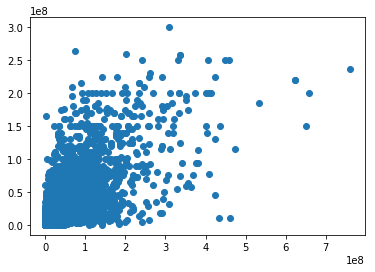

In [67]:
plt.scatter(df['gross'][df['country']=='USA'],df['budget'][df['country']=='USA'])
plt.show()

## Predicting imdb score of US movies produced within 5 years


In [165]:
#guessing 
col1=['budget','genres','title_year','aspect_ratio',
      'num_critic_for_reviews','num_user_for_reviews','imdb_score']
df1=df[col1][df['country']=='USA'][df['title_year']>= 2012]
df1[col1].head()
print df1.shape

(779, 7)


/Users/kaoichen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [144]:
#drop any na 
df1=df1.dropna(how='any')

In [153]:
#normalize imdb score
xmin = np.array(df1['imdb_score']).min()
xmax = np.array(df1['imdb_score']).max()
range_ = xmax - xmin
df1['norm_score']=df1['imdb_score'].apply(lambda i: (i-xmin)/range_)
df1.head()

,budget,genres,title_year,aspect_ratio,num_critic_for_reviews,num_user_for_reviews,imdb_score,norm_score,genres1,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
3,250000000.0,Action|Thriller,2012.0,2.35,813.0,2701.0,8.5,0.984375,"[Action, Thriller]",0,...,0,0,0,0,0,0,0,1,0,0
5,263700000.0,Action|Adventure|Sci-Fi,2012.0,2.35,462.0,738.0,6.6,0.687500,"[Action, Adventure, Sci-Fi]",1,...,0,0,0,0,0,1,0,0,0,0
8,250000000.0,Action|Adventure|Sci-Fi,2015.0,2.35,635.0,1117.0,7.5,0.828125,"[Action, Adventure, Sci-Fi]",1,...,0,0,0,0,0,1,0,0,0,0
10,250000000.0,Action|Adventure|Sci-Fi,2016.0,2.35,673.0,3018.0,6.9,0.734375,"[Action, Adventure, Sci-Fi]",1,...,0,0,0,0,0,1,0,0,0,0
14,215000000.0,Action|Adventure|Western,2013.0,2.35,450.0,711.0,6.5,0.671875,"[Action, Adventure, Western]",1,...,0,0,0,0,0,0,0,0,0,1


In [189]:
# making genres to dummies variables
df1['genres1']=df1['genres'].apply(lambda i: i.split("|"))
df1['genres1'].head()

def all_genre(array):
    lst=[]
    for i in array:
        for e in i:
            if e not in lst:
                lst.append(e)
    return sorted(lst)
all_genre=all_genre(df1['genres1'])

for i in range(1,len(all_genre)):
    df1[all_genre[i]]=df1['genres1'].apply(lambda x: 1 if all_genre[i] in x else 0)

In [151]:
#make dummies for title year 
title_year = pd.get_dummies(df1['title_year'],prefix = 'movie_of_')
final1 = df1.join(title_year.ix[:, 'movie_of_2012.0':])
final1['intercept'] = 1.0
final1=final1.dropna(how='any')
print list(final1)
print final1.shape

['budget', 'genres', 'title_year', 'aspect_ratio', 'num_critic_for_reviews', 'num_user_for_reviews', 'imdb_score', 'norm_score', 'genres1', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'movie_of__2012.0', 'movie_of__2013.0', 'movie_of__2014.0', 'movie_of__2015.0', 'movie_of__2016.0', 'intercept']
(621, 35)


/Users/kaoichen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [154]:
X=final1[['budget', 'num_critic_for_reviews', 'num_user_for_reviews', 'Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family', 'Fantasy', 'History','Horror','Music', 'Musical','Mystery','Romance', 'Sci-Fi','Sport','Thriller', 'War','Western', 'movie_of__2013.0', 'movie_of__2014.0', 'movie_of__2015.0', 'movie_of__2016.0', 'intercept']]
Y=final1['norm_score']

In [155]:
mul_reg = sm.OLS(Y,X).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             norm_score   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     21.34
Date:                Sat, 19 Aug 2017   Prob (F-statistic):           3.54e-70
Time:                        21:08:28   Log-Likelihood:                 581.05
No. Observations:                 621   AIC:                            -1106.
Df Residuals:                     593   BIC:                            -982.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
budget                 -1.108e-10   1.31e-10     -0.843      0.399   -3.69e-10    1.47e-10
num_critic_for_reviews     0.0006   4.41e-05     13.547      0.000       0.001       0.001
num_user_for_reviews   -4.964e-05   2.09e-05     -2.375      0.018   -9.07e-05   -8.58e-06
Adventure                  0.0106      0.014      0.736      0.462      -0.018       0.039
Animation                  0.0916      0.022      4.094      0.000       0.048       0.135
Biography                  0.0444      0.019      2.390      0.017       0.008       0.081
Comedy                     0.0074      0.011      0.681      0.496      -0.014       0.029
Crime                      0.0052      0.012      0.423      0.673      -0.019       0.030
Documentary                0.1616      0.034      4.782      0.000       0.095       0.228
Drama                      0.0464      0.010      4.700      0.000       0.027       0.066
Family                     0.0135      0.018      0.734      0.463      -0.023       0.049
Fantasy                   -0.0220      0.013     -1.651      0.099      -0.048       0.004
History                   -0.0075      0.028     -0.266      0.790      -0.063       0.048
Horror                    -0.0557      0.014     -3.984      0.000      -0.083      -0.028
Music                      0.0189      0.022      0.878      0.380      -0.023       0.061
Musical                   -0.0133      0.030     -0.438      0.662      -0.073       0.046
Mystery                    0.0142      0.014      0.981      0.327      -0.014       0.043
Romance                    0.0238      0.012      1.978      0.048       0.000       0.047
Sci-Fi                    -0.0166      0.013     -1.259      0.208      -0.043       0.009
Sport                      0.0614      0.025      2.471      0.014       0.013       0.110
Thriller                  -0.0050      0.011     -0.446      0.656      -0.027       0.017
War                        0.0139      0.028      0.492      0.623      -0.042       0.070
Western                   -0.0179      0.032     -0.562      0.574      -0.080       0.045
movie_of__2013.0           0.0001      0.011      0.012      0.990      -0.022       0.022
movie_of__2014.0           0.0134      0.012      1.139      0.255      -0.010       0.036
movie_of__2015.0           0.0097      0.012      0.799      0.425      -0.014       0.034
movie_of__2016.0           0.0566      0.016      3.538      0.000       0.025       0.088
intercept                  0.4251      0.016     27.277      0.000       0.394       0.456
==============================================================================
Omnibus:                       53.460   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.713
Skew:                    

## Predicting imdb score of US movies produced within 5 years (beforehand)

In [235]:
col2=['budget','genres','title_year','language','imdb_score','director_facebook_likes',
      'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']
df2=df[col2][df['title_year']>=2012][df['country']=='USA']
df2=df2.dropna(how='any')

xmin2 = np.array(df2['imdb_score']).min()
xmax2 = np.array(df2['imdb_score']).max()
range_2= xmax2 - xmin2
df2['imdb_score']=df2['imdb_score'].apply(lambda i: (i-xmin2)/range_2)

df2['if_english']=df2['language'].apply(lambda i: 1 if i =='English' else 0)

df2['genres']=df2['genres'].apply(lambda i: i.split("|"))
def all_genre(array):
    lst=[]
    for i in array:
        for e in i:
            if e not in lst:
                lst.append(e)
    return sorted(lst)

genre_list2 = all_genre(df2['genres'])

for i in range(len(genre_list2)):
    df2[genre_list2[i]]=df2['genres'].apply(lambda x: 1 if all_genre2[i] in x else 0)


title_year2 = pd.get_dummies(df2['title_year'],prefix = 'movie_of_')
final2 = df2.join(title_year2)


final2['intercept'] = 1.0

print list(final2)
print df2.shape

['budget', 'genres', 'title_year', 'language', 'imdb_score', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'if_english', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'movie_of__2012.0', 'movie_of__2013.0', 'movie_of__2014.0', 'movie_of__2015.0', 'movie_of__2016.0', 'intercept']
(716, 32)


/Users/kaoichen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [228]:
X2= final2[['budget','if_english', 'director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
            'actor_3_facebook_likes', 'Adventure', 'Animation', 'Biography', 'Comedy',
            'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 
            'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'movie_of__2013.0', 
           'movie_of__2014.0', 'movie_of__2015.0', 'movie_of__2016.0', 'intercept']]
Y2=final2['imdb_score']

mul_reg2=sm.OLS(Y2,X2).fit()
mul_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     8.407
Date:                Sat, 19 Aug 2017   Prob (F-statistic):           2.24e-31
Time:                        22:33:55   Log-Likelihood:                 399.19
No. Observations:                 716   AIC:                            -734.4
Df Residuals:                     684   BIC:                            -588.0
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
budget                    8.07e-10   1.67e-10      4.820      0.000    4.78e-10    1.14e-09
if_english                 -0.0089      0.084     -0.105      0.916      -0.174       0.156
director_facebook_likes  4.479e-06   2.12e-06      2.110      0.035     3.1e-07    8.65e-06
actor_1_facebook_likes  -2.101e-07   3.63e-07     -0.580      0.562   -9.22e-07    5.02e-07
actor_2_facebook_likes   2.416e-06    1.7e-06      1.425      0.155   -9.13e-07    5.75e-06
actor_3_facebook_likes   7.354e-08   2.77e-06      0.027      0.979   -5.36e-06    5.51e-06
Adventure                   0.0222      0.020      1.088      0.277      -0.018       0.062
Animation                   0.0621      0.029      2.106      0.036       0.004       0.120
Biography                   0.0758      0.026      2.931      0.003       0.025       0.127
Comedy                      0.0100      0.014      0.702      0.483      -0.018       0.038
Crime                       0.0463      0.017      2.761      0.006       0.013       0.079
Documentary                 0.1995      0.035      5.722      0.000       0.131       0.268
Drama                       0.0827      0.013      6.350      0.000       0.057       0.108
Family                      0.0093      0.024      0.386      0.699      -0.038       0.056
Fantasy                    -0.0301      0.019     -1.599      0.110      -0.067       0.007
History                     0.0395      0.041      0.966      0.334      -0.041       0.120
Horror                     -0.0286      0.018     -1.556      0.120      -0.065       0.007
Music                       0.0263      0.027      0.981      0.327      -0.026       0.079
Musical                    -0.0458      0.040     -1.154      0.249      -0.124       0.032
Mystery                     0.0307      0.020      1.549      0.122      -0.008       0.070
News                        0.0292      0.145      0.201      0.841      -0.256       0.315
Romance                     0.0351      0.017      2.089      0.037       0.002       0.068
Sci-Fi                      0.0192      0.018      1.067      0.286      -0.016       0.055
Sport                       0.0292      0.033      0.876      0.381      -0.036       0.095
Thriller                   -0.0162      0.015     -1.064      0.288      -0.046       0.014
War                         0.0155      0.042      0.374      0.709      -0.066       0.097
Western                    -0.0131      0.045     -0.290      0.772      -0.102       0.076
movie_of__2013.0            0.0037      0.016      0.229      0.819      -0.028       0.035
movie_of__2014.0           -0.0024      0.016     -0.149      0.882      -0.034       0.029
movie_of__2015.0           -0.0387      0.016     -2.374      0.018      -0.071      -0.007
movie_of__2016.0           -0.0153      0.021  

## Predicting Gross of US movies before launch with 5 year data 

In [24]:
col3=['budget','genres','title_year','language','director_facebook_likes',
      'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','gross']
df3 = df[col3][df['title_year']>=2012][df['country']=='USA']
df3.shape

/Users/kaoichen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(779, 9)

In [226]:
#number of directors 
df['imdb_score'][df['country']=='USA'][df['title_year']>=2012].groupby(df['director_name']).mean().shape

(612,)

In [25]:
df3['if_english']=df3['language'].apply(lambda i: 1 if i =='English' else 0)

df3['genres']=df3['genres'].apply(lambda i: i.split("|"))
def all_genre(array):
    lst=[]
    for i in array:
        for e in i:
            if e not in lst:
                lst.append(e)
    return sorted(lst)

genre_list3 = all_genre(df3['genres'])

for i in range(len(genre_list3)):
    df3[genre_list3[i]]=df3['genres'].apply(lambda x: 1 if genre_list3[i] in x else 0)


title_year3 = pd.get_dummies(df3['title_year'],prefix = 'movie_of_')
final3 = df3.join(title_year3)

final3['intercept'] = 1.0
final3=final3.dropna(how='any')

print final3.shape
print list(final3)

(568, 39)
['budget', 'genres', 'title_year', 'language', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'gross', 'if_english', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western', 'movie_of__2012.0', 'movie_of__2013.0', 'movie_of__2014.0', 'movie_of__2015.0', 'movie_of__2016.0', 'intercept']


In [26]:
X3=final3[['budget', 'director_facebook_likes', 
          'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
          'if_english', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
          'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 
          'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western', 
          'movie_of__2013.0', 'movie_of__2014.0', 'movie_of__2015.0', 'movie_of__2016.0', 
          'intercept']]
Y3=final3['gross']

mul_reg3=sm.OLS(Y3,X3).fit()
mul_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     22.03
Date:                Sat, 19 Aug 2017   Prob (F-statistic):           1.17e-74
Time:                        23:05:06   Log-Likelihood:                -10983.
No. Observations:                 568   AIC:                         2.203e+04
Df Residuals:                     537   BIC:                         2.216e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
budget                      0.8912      0.079     11.264      0.000       0.736       1.047
director_facebook_likes  1170.0201    978.112      1.196      0.232    -751.374    3091.414
actor_1_facebook_likes   -152.2665    201.425     -0.756      0.450    -547.944     243.411
actor_2_facebook_likes    821.3984    756.622      1.086      0.278    -664.903    2307.700
actor_3_facebook_likes   5899.7367   1232.944      4.785      0.000    3477.752    8321.721
if_english               4.763e+06   3.72e+07      0.128      0.898   -6.83e+07    7.78e+07
Adventure               -7.447e+06   9.39e+06     -0.793      0.428   -2.59e+07     1.1e+07
Animation                3.027e+07   1.48e+07      2.045      0.041    1.19e+06    5.93e+07
Biography                6.436e+06   1.24e+07      0.521      0.603   -1.78e+07    3.07e+07
Comedy                   9.073e+06   7.33e+06      1.238      0.216   -5.33e+06    2.35e+07
Crime                   -2.179e+06   8.29e+06     -0.263      0.793   -1.85e+07    1.41e+07
Documentary              1.077e+06   1.99e+07      0.054      0.957    -3.8e+07    4.01e+07
Drama                   -3.931e+06    6.7e+06     -0.587      0.558   -1.71e+07    9.23e+06
Family                   6.163e+06   1.24e+07      0.496      0.620   -1.83e+07    3.06e+07
Fantasy                 -1.514e+07   8.77e+06     -1.726      0.085   -3.24e+07    2.09e+06
History                  3.745e+07   1.97e+07      1.897      0.058   -1.33e+06    7.62e+07
Horror                   7.215e+06   9.96e+06      0.724      0.469   -1.24e+07    2.68e+07
Music                    6.818e+06   1.32e+07      0.517      0.605   -1.91e+07    3.27e+07
Musical                  3.951e+06    1.9e+07      0.208      0.835   -3.33e+07    4.12e+07
Mystery                  -2.46e+06   9.81e+06     -0.251      0.802   -2.17e+07    1.68e+07
News                    -2.842e-05    2.9e-05     -0.980      0.327   -8.54e-05    2.85e-05
Romance                  6.322e+06   8.04e+06      0.786      0.432   -9.47e+06    2.21e+07
Sci-Fi                   2.776e+07   8.46e+06      3.280      0.001    1.11e+07    4.44e+07
Short                    1.396e-05   1.42e-05      0.981      0.327    -1.4e-05    4.19e-05
Sport                   -1.145e+07   1.53e+07     -0.747      0.456   -4.16e+07    1.87e+07
Thriller                 3.872e+06   7.85e+06      0.493      0.622   -1.16e+07    1.93e+07
War                      3.109e+07   1.85e+07      1.682      0.093   -5.21e+06    6.74e+07
Western                 -1.221e+07   2.36e+07     -0.517      0.605   -5.86e+07    3.42e+07
movie_of__2013.0        -4.056e+06   7.61e+06     -0.533      0.594    -1.9e+07    1.09e+07
movie_of__2014.0         1.626e+06   7.72e+06      0.210      0.833   -1.35e+07    1.68e+07
movie_of__2015.0        -2.546e+06   8.07e+06  